# Zadatak 3

Tekst zadataka: \
U narednim zadacima cemo se baviti lokalnim poravnanjem: simulirajte 1000 {0, 1} - nizova duljine 200, i odredite - u svakom nizu - najdulji niz uspjeha (recimo da je "1" uspjeh); te duljine zapisite u datoteku i provjerite da je tako dobiveni histogram aproksimativno Gumbel distribuiran; analogno, simulirajte 1000 proteina (aminokiselinskih nizova), svaki duljine 200 (simulaciju provedite isto kao i za nizove {0,1}), i za svaki niz odredite optimalno lokalno poravnanje sa zadanim nizom (recimo, "LALAHPEW", ili nesto slicno); u datoteku zapisite score-ove tih poravnanja; kao i u {0,1}-slucaju, tako dobiveni histogram ce biti aproksimativno Gumbel distribuiran... time ste "pokazali" da je optimalno lokalno poravnanje "ista" stvar kao i trazenje najduljeg niza uspjeha!

In [4]:
import random

f1=open("acids.txt", "r") ## reading acids
ak=f1.readline()
f1.close()

bm=[] ## reading matrix
f1=open("blosum50.txt", "r")
for i in range(20):
    line=f1.readline()
    vc=line.split()
    bm.append(vc[:])
for i in range(20): ## integer matrix
    for j in range(20):
        bm[i][j]=int(bm[i][j])

x='HPEWAAKEGHIAAKE'
y='PWALVNGSEEWA'
m=len(x)
n=len(y)

niz=[0]*m+[1]*n


sm=[] ## score matrix
tmp=[]
for i in range(m+1):
    tmp.append(0)
for i in range(n+1):
    sm.append(tmp[:])

## rubni uvjeti
for i in range(n+1):
    sm[i][0]=-8*i
for i in range(m+1):
    sm[0][i]=-8*i

## rekurzija
for i in range(1,n+1):
    for j in range(1,m+1):
        tmp=[]
        tmp.append(sm[i-1][j]-8)
        tmp.append(sm[i][j-1]-8)
        bb=bm[ak.index(y[i-1])][ak.index(x[j-1])]
        tmp.append(sm[i-1][j-1]+bb)
        tmp.sort()
        sm[i][j]=tmp[2]




In [5]:
f=open("zad3.txt", "w")

from random import shuffle

for i in range(1000):
    skor=0
    xx=''
    yy=''
    niz2=niz
    shuffle(niz2)
    j=0 ##x
    k=0 ##y
    for ii in range(m+n):
        if ii==0:
            if niz2[ii]==1:
                xx=xx+'_'
                yy=yy+y[k]
                k=k+1
            else:
                xx=xx+x[j]
                j=j+1
        elif niz2[ii]==1 and niz2[ii-1]==1:
            xx=xx+'_'
            yy=yy+y[k]
            k=k+1
        elif niz2[ii]==1 and niz2[ii-1]==0:
            yy=yy+y[k]
            k=k+1
        elif niz2[ii]==0 and niz2[ii-1]==0:
            yy=yy+'_'
            xx=xx+x[j]
            j=j+1
        elif niz2[ii]==0 and niz2[ii-1]==1:
            xx=xx+x[j]
            j=j+1
    raz=len(xx)-len(yy)
    if raz>0: ##x dulji
        yy=yy+'_'*raz
    elif raz<0: ##y dulji
        xx=xx+'_'*(-raz)
    for ii in range(len(xx)):
        if xx[ii]=='_' or yy[ii]=='_':
            skor=skor-8
        else:
            p=0
            r=0
            while xx[ii]!=ak[p]:
                p=p+1
            while yy[ii]!=ak[r]:
                r=r+1
            skor=skor+bm[p][r]
    ##print i+1, ":\n", niz2, "\n", xx, "\n", yy, "\nskor=",skor, "\n"
    f.write('%d ' % (skor))
f.close()

## Ellini pokusaji

In [6]:
import numpy as np

In [25]:
def maxlength(s):
    n = len(s)
    ans = 0;
    for i in range(n):
         
        # Count the number of contiguous 1's
        if (s[i] == '1'):
            count = 1
            j = i + 1
            while(j <= n - 1 and s[j] == '1'):
                count += 1
                j += 1
            ans = max(ans, count)
    return ans

1


In [30]:
import random

def rand_key(p):
    key1 = ""
    for i in range(p):
        temp = str(random.randint(0, 1))
        key1 += temp
         
    return(key1)

Desired length random binary string is:  0111110


In [54]:
duljine = np.empty([1000])

for i in range(1000):
    niz = rand_key(200)
    duljina = maxlength(niz)
    #print(duljina)
    duljine[i] = duljina

np.histogram(duljine)

(array([ 34, 178, 263, 220, 143, 104,  34,  14,   6,   4]),
 array([ 3. ,  4.2,  5.4,  6.6,  7.8,  9. , 10.2, 11.4, 12.6, 13.8, 15. ]))

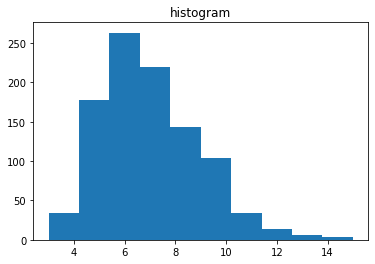

In [56]:
from matplotlib import pyplot as plt 
  

plt.hist(duljine) 
plt.title("histogram") 
plt.show()